In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)   

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Each image has some type of feature or something 


In [6]:
import matplotlib.pyplot as plt

def plot_img(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

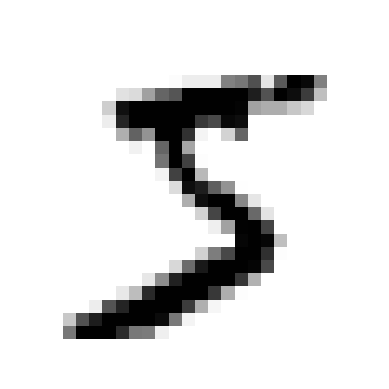

In [7]:
some_digit = X[0]
plot_img(some_digit)
plt.show()

In [8]:
y[0]

'5'

## Split into training set and test set

Why did we use this 10% for testing is there a particular reason

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

Let's first deal with a simpler problem 5 and non 5, that's what binary mean. Either this or that

In [10]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

Let's pick a classifier and train it stochastic gradient descent, this is something called a binary classifier that check whether something is the thing we're looking for and something is not the thing we're looking for


In [11]:
# We're training something here I don't know what yet
# Should do something about training these stupid shit like have a model ready and import it out
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

## Performances Measures

Measuring Accuracy using cross-validaton

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


### Confusion Matrices

The above method doesn't show the full picture of how the method comes to be
To compute confusion matrix needed a set of predictions so they can be compared to the actual targets

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [17]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Precision and Recall


In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

As you can see the model doesn't look as good as it used to be, among all the correct guess it only guess the 83% of the 5, and it only collect 65% of the 5 among all 5

The F1-score is the harmonic mean of the precision and recall, it put more emphasis on the lower weight. It is a type of descriptive statistics


In [20]:
from sklearn.metrics import f1_score 

f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Precision/Recall Trade off

With higher precision usually comes with lower recalls. Think of it like this, the recall is the number of

In [21]:
y_scores = sgd_clf.decision_function([some_digit])

In [22]:
y_scores

array([2164.22030239])

In [23]:
threshold = 0

In [24]:
y_some_digit_pred = (y_scores > threshold)

In [25]:
threshold = 3000
y_scores > threshold

array([False])

In [26]:
# this is result for further analysis

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [27]:
# what the fuck is it types then?
y_scores.shape

(60000,)

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [29]:
precisions.shape

(60001,)

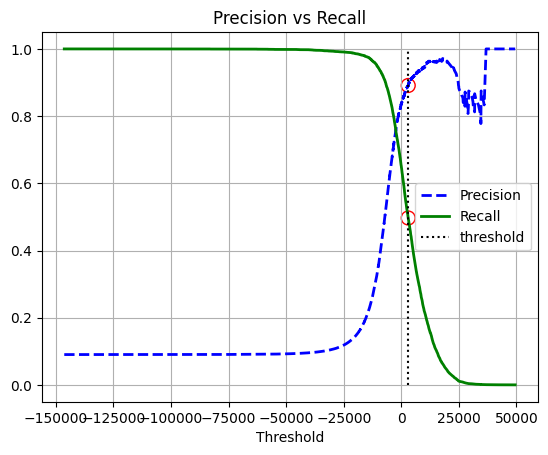

In [30]:
# ! This is just for data analysis
import numpy as np

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
# plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Calculate the y-values where the threshold line intersects the precision and recall lines
# This is a placeholder; you will need to calculate this based on your data
precision_at_threshold = np.interp(threshold, thresholds, precisions[:-1])
recall_at_threshold = np.interp(threshold, thresholds, recalls[:-1])

# Add circles at the intersection points
plt.scatter([threshold, threshold], [precision_at_threshold, recall_at_threshold], s=100, facecolors='none', edgecolors='r')


plt.title("Precision vs Recall")
plt.xlabel("Threshold")
plt.legend()

plt.grid()
plt.show()

Text(0.9, 0.19035000000000002, 'Higher threshold')

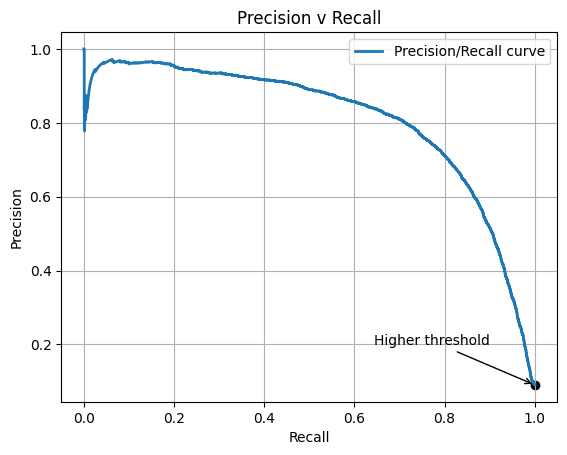

In [31]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.grid()
plt.legend()
plt.title("Precision v Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")

threshold_index = np.argmax(np.abs(thresholds - threshold))

plt.scatter([recalls[threshold_index]], [precisions[threshold_index]], color='black')

# Annotate the point with text and an arrow
plt.annotate('Higher threshold', 
             xy=(recalls[threshold_index], precisions[threshold_index]), 
             xytext=(recalls[threshold_index]-0.1, precisions[threshold_index]+0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right', verticalalignment='bottom')



You can find the lowest threshold that gives you 90% precision, for this you can use the NumPy array's argmax(), this return the first index of the maximum value, which is in this case means the first `True` value


In [32]:
idx_for_90_precision = (precisions >= 0.90).argmax()


In [33]:
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [34]:
precisions.shape

(60001,)

In [35]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

#### ROC Curve

Also known as the receiver operating characteristic is another common toll used with binary classifier 

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [38]:
fpr.shape

(3908,)

Text(0, 0.5, 'True Positive Rate (Recall)')

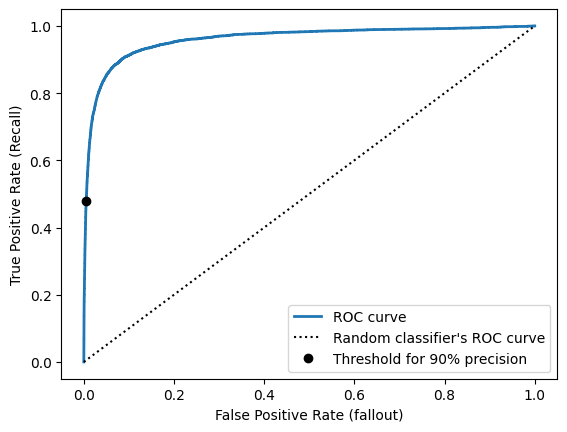

In [39]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.legend()
plt.xlabel("False Positive Rate (fallout)")
plt.ylabel("True Positive Rate (Recall)")

To reach 90% precision. Find the first true value

In [40]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

This is me


In [42]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, method="predict_proba")

In [43]:
y_probas_forest[:2]


array([[0.14, 0.86],
       [0.99, 0.01]])

In [44]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

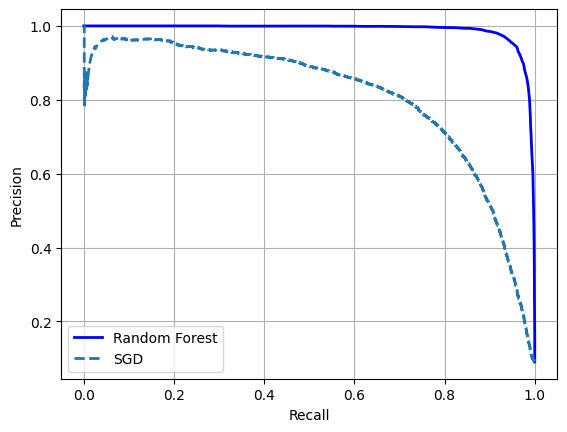

In [45]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.grid()
plt.legend()



plt.show()

In [46]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5

In [47]:
f1_score(y_train_5, y_train_pred_forest)

0.9314961399394117

In [48]:
roc_auc_score(y_train_5, y_scores_forest)

0.998402186461512

## Multiclass Classification


We going to try using binary classifier to classify the whole thing lol


In [49]:
# * We using y_train not y_train_5 cause we're more interested in the result lol
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [50]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

This code actually make 45 predictions - one per pair of classes - and it selected the class that won the most duels. If you call th  `decision_function()` method, it returns 10 score per instances

In [51]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [52]:
class_id = some_digit_scores.argmax()
class_id

5

In [53]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [54]:
svm_clf.classes_[class_id]

'5'

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

## Error Analysis


Now let do cross_val_predict with sgd_clf and confusion matrix


What the fuck is that confusion matrix, also where is the true positive also why my confusion matrix doesn't look like this


Confusion matrix normal


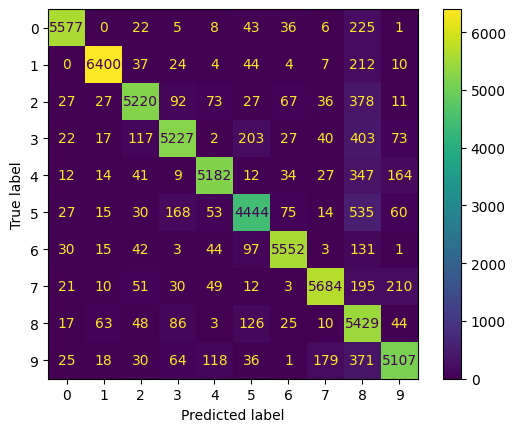

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

Confusion matrix after normalizing the data by row

Text(0.5, 1.0, 'CM normalized by row')

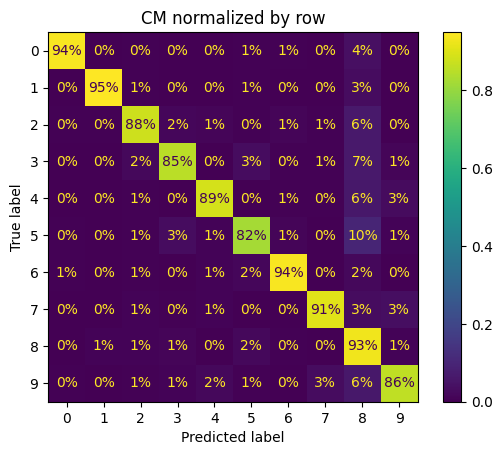

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")

plt.title("CM normalized by row")

Text(0.5, 1.0, 'CM normalized by column')

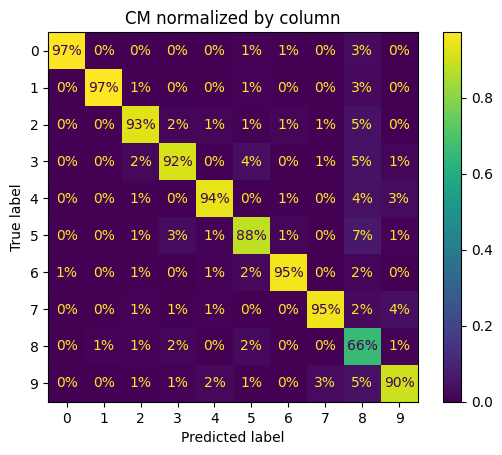

In [58]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="pred", values_format=".0%")

plt.title("CM normalized by column")

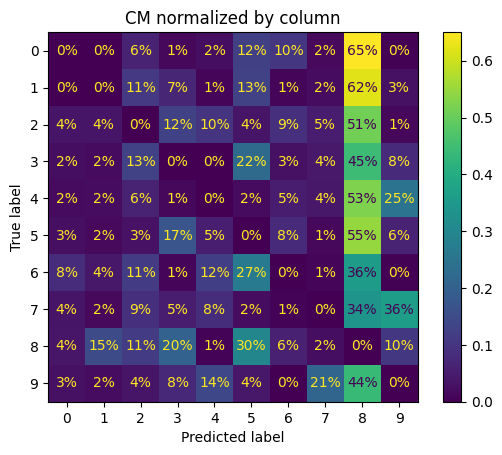

In [59]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")


plt.title("CM normalized by column")
plt.show()

There are many ways to make it more fun lol


##  Multilabel Classification


There are some cases where you want your classifier to output multiple classes for each instance. Consider a face-recognition classifier: what should it do if it recognizes several people in the same picture? It should attach one tag per person it recognize 


We're not going into that just yet so just let do an easy one

In [63]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7') # is larger or equal to 7
y_train_odd = (y_train.astype("int8") % 2 == 1) # and is odd

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)



KNeighborsClassifier()

In [67]:
knn_clf.predict([some_digit])

some_digit.shape

(784,)

In [69]:
knn_clf.predict([X_test[0]]) # batch learning lol
y_test[0]

'7'